In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.io import loadmat
%run logistic_regression.ipynb

In [2]:
datafile = "ex2data3.mat"
imagesData = loadmat(datafile)
initial_data = np.array(imagesData["X"])
class_tags = np.array(imagesData["y"])
imagesCount = initial_data.shape[0]
classes = []
randomImages = []
for i in range(imagesCount): 
    if class_tags[i][0] in classes:
        continue
    
    classes.append(class_tags[i][0])
    randomImages.append(initial_data[i])
    
    if len(randomImages) == 10: 
        break  
        
randomImages = np.array(randomImages)

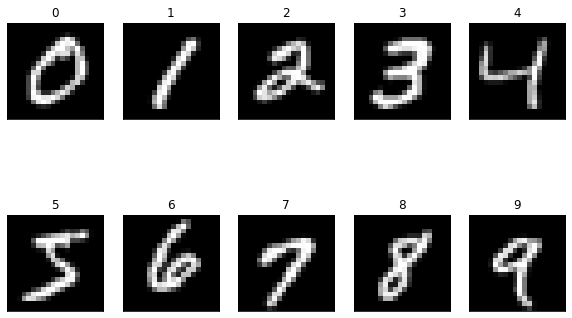

In [3]:
from PIL import Image

count = randomImages.shape[0]
columns = 5
rows = int(count / 4) + 1
fig=plt.figure(figsize=(10, 10))
executed = 0;
for i in range(1, columns*rows +1):
    if count <= executed: 
        break
    
    class_title = classes[executed]
    
    if class_title == 10: 
        class_title = 0
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(Image.fromarray(randomImages[executed].reshape(20, 20).T*255))
    plt.title(class_title)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    executed+=1
plt.show()

In [4]:
# Split data set on training and test sets with proportions 80/20.
# Function sample() returns a random sample of items.
#pd_train_data = data.sample(frac=0.8)
#pd_test_data = data.drop(pd_train_data.index)
#
## Convert training and testing data from Pandas to NumPy format.
#train_data = pd_train_data.values
#test_data = pd_test_data.values
#
## Extract training/test labels and features
#x_train = train_data[:num_training_examples, 1:]
#y_train = train_data[:num_training_examples, [0]]

from sklearn.model_selection import train_test_split
data = pd.DataFrame(np.hstack((class_tags, initial_data)))

pd_train_data = data.sample(frac=0.8)
pd_test_data = data.drop(pd_train_data.index)

# Convert training and testing data from Pandas to NumPy format.
train_data = pd_train_data.values
test_data = pd_test_data.values

# Extract training/test labels and features.
num_training_examples = 6000
x_train = train_data[:num_training_examples, 1:]
y_train = train_data[:num_training_examples, [0]]

x_test = test_data[:, 1:]
y_test = test_data[:, [0]]

In [ ]:
# Set up linear regression parameters.
max_iterations = 10000  # Max number of gradient descent iterations.
regularization_param = 10  # Helps to fight model overfitting.
normalize_data = True  # Whether we need to normalize data to make it more unifrom or not. 

# Init logistic regression instance.
logistic_regression = LogisticRegression(x_train, y_train, normalize_data)

# Train logistic regression.
(thetas, costs) = logistic_regression.train(regularization_param, max_iterations)

In [15]:
pd.DataFrame(thetas)

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-10.188044,0.0,0.0,0.010560,-0.010516,-0.005425,0.030268,-0.092361,0.051551,-0.001206,...,0.165699,-0.000579,-0.036830,0.102877,0.000412,-0.017291,-0.089786,0.113186,-0.043145,0.0
1,-6.546811,0.0,0.0,-0.004339,0.005546,0.016617,-0.084793,-0.015107,-0.040273,-0.002239,...,0.192921,-0.030254,0.115727,-0.109612,0.144087,-0.023214,-0.019128,0.024926,0.000308,0.0
2,-6.691549,0.0,0.0,-0.019508,0.015534,0.028031,0.051459,-0.000373,-0.019769,0.015674,...,0.045819,0.120667,0.022704,-0.051450,0.027554,-0.031052,0.008907,-0.000780,-0.000152,0.0
3,-8.076608,0.0,0.0,-0.000841,-0.001170,0.017520,0.018084,-0.053493,-0.011714,0.020253,...,-0.124206,0.066230,-0.018725,0.000308,0.013260,-0.003574,0.001140,-0.000511,-0.001040,0.0
4,-6.545246,0.0,0.0,-0.003576,0.003557,0.001847,0.000401,-0.001313,0.000482,0.000593,...,0.023429,-0.108218,-0.044273,-0.020343,-0.012505,0.006549,0.032204,-0.035802,0.000065,0.0
5,-8.267642,0.0,0.0,-0.004653,0.005397,-0.004200,0.007265,-0.022798,-0.006940,0.000918,...,-0.205298,0.050137,-0.036403,-0.004793,-0.051068,-0.015303,0.006702,-0.001348,0.000115,0.0
6,-8.503636,0.0,0.0,-0.006290,-0.001218,0.047121,0.022826,0.156641,-0.058493,-0.000952,...,-0.117152,0.000121,-0.002903,-0.026936,-0.008861,-0.017269,0.005542,-0.000353,0.000014,0.0
7,-5.658483,0.0,0.0,-0.005787,0.005464,0.005478,0.020578,-0.063038,-0.026448,0.007986,...,-0.129469,0.010063,0.028694,-0.104455,0.036294,-0.027596,0.013136,-0.006397,-0.000223,0.0
8,-6.837132,0.0,0.0,-0.001484,-0.001460,0.025634,0.007652,-0.019101,-0.009229,-0.010488,...,0.034882,0.051190,0.000226,-0.026126,0.006385,0.015408,0.046411,-0.053745,0.000015,0.0
9,-7.664966,0.0,0.0,-0.000493,-0.001167,0.009137,0.017694,0.002375,0.000467,0.000129,...,-0.012652,0.021684,0.039757,0.012310,0.000575,0.000289,0.000934,-0.001187,-0.000013,0.0


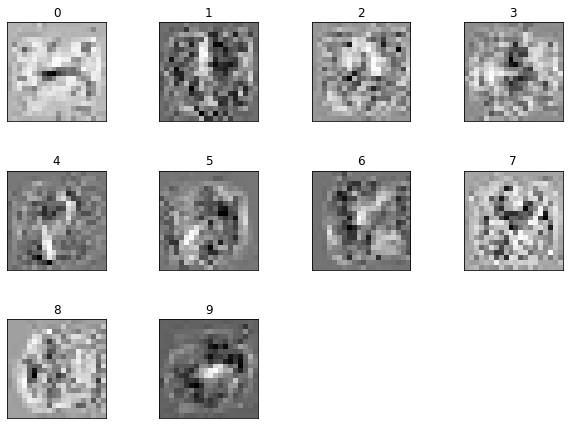

In [16]:
# How many numbers to display.
numbers_to_display = 10

# Calculate the number of cells that will hold all the numbers.
num_cells = math.ceil(math.sqrt(numbers_to_display))

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(10, 10))

# Go through the thetas and print them.
for plot_index in range(numbers_to_display):
    # Extrace digit data.
    digit_pixels = thetas[plot_index][1:]

    # Calculate image size (remember that each picture has square proportions).
    image_size = int(math.sqrt(digit_pixels.shape[0]))
    
    # Convert image vector into the matrix of pixels.
    frame = digit_pixels.reshape((image_size, image_size))
    
    # Plot the number matrix.
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(frame, cmap='Greys')
    plt.title(plot_index)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Plot all subplots.
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

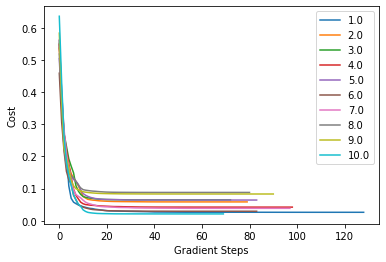

In [17]:
labels = logistic_regression.unique_labels
for index, label in enumerate(labels):
    plt.plot(range(len(costs[index])), costs[index], label=labels[index])

plt.xlabel('Gradient Steps')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [21]:
# Make training set predictions.
y_train_predictions = logistic_regression.predict(x_train)
y_test_predictions = logistic_regression.predict(x_test)

# Check what percentage of them are actually correct.
train_precision = np.sum(y_train_predictions == y_train) / y_train.shape[0] * 100
test_precision = np.sum(y_test_predictions == y_test) / y_test.shape[0] * 100

print('Training Precision: {:5.4f}%'.format(train_precision))
print('Test Precision: {:5.4f}%'.format(test_precision))

Training Precision: 95.7250%
Test Precision: 91.2000%


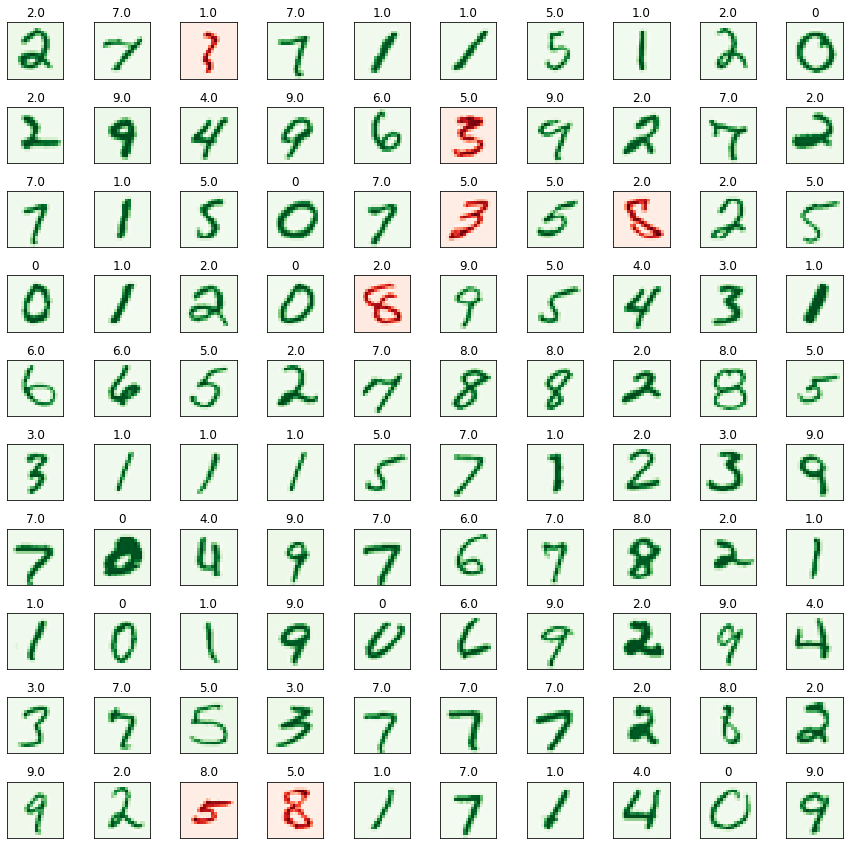

In [29]:
from random import randrange

# How many numbers to display.
numbers_to_display = 100

# Calculate the number of cells that will hold all the numbers.
num_cells = math.ceil(math.sqrt(numbers_to_display))

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(15, 15))

# Go through the first numbers in a test set and plot them.
for plot_index in range(numbers_to_display):
    index = randrange(0, y_test.shape[0])
    
    # Extrace digit data.
    digit_label = y_test[index, 0]
    digit_pixels = x_test[index, :]
    
    # Predicted label.
    predicted_label = y_test_predictions[index][0]

    # Calculate image size (remember that each picture has square proportions).
    image_size = int(math.sqrt(digit_pixels.shape[0]))
    
    # Convert image vector into the matrix of pixels.
    frame = digit_pixels.reshape((image_size, image_size)).T
    
    # Plot the number matrix.
    color_map = 'Greens' if predicted_label == digit_label else 'Reds'
    
    if predicted_label == 10: predicted_label = 0
    
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(frame, cmap=color_map)
    plt.title(predicted_label)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Plot all subplots.
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()